In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pickle

In [2]:
import scienceplots
plt.style.use('science')

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [3]:
from matplotlib.colors import LinearSegmentedColormap

colors = [
    [176, 91, 155],
    [150, 122, 173],
    [121, 95, 165],
    [96, 78, 166],
    [88, 95, 196],
    [91, 142, 215],
    [112, 169, 226],
    [142, 191, 240],
    [176, 211, 253],
    [101, 143, 204],
    [255, 189, 225],
    [125, 124, 124]
]
colors = np.array(colors) / 255.0
cmap = LinearSegmentedColormap.from_list("custom_diverging", colors, N=256)

mlp_color = colors[-2]
gnn_color = colors[0]  
segnn_color = colors[3]  
segnn_lmax2_color = colors[2] 
nequip_color = colors[6]  
nequip_lmax2_color = colors[5]  
egnn_color = colors[-1]


In [4]:
n_list = [4, 64, 256, 1248, 6304,]# 32000]

models_dir = Path('velocity_task_consistent_trees/')

def read_loss(model, n, dataset):
    with open(models_dir / f'{model}_{n}_f1.0' / f'loss_dict.pkl', 'rb') as f:
        f = pickle.load(f)
    return f[f'{dataset}_loss']


def get_losses_for_model(model, n_list):
    test_losses = []
    for n in n_list:
        test_losses.append(read_loss(model, n, 'test'))
    return test_losses

In [5]:
gnn_losses = get_losses_for_model('gnn', n_list)
segnn_losses = get_losses_for_model('segnn', n_list)
nequip_losses = get_losses_for_model('nequip', n_list)
segnn_lmax2_losses = get_losses_for_model('segnn_l2', n_list)
nequip_l2_losses = get_losses_for_model('nequip_l2', n_list)

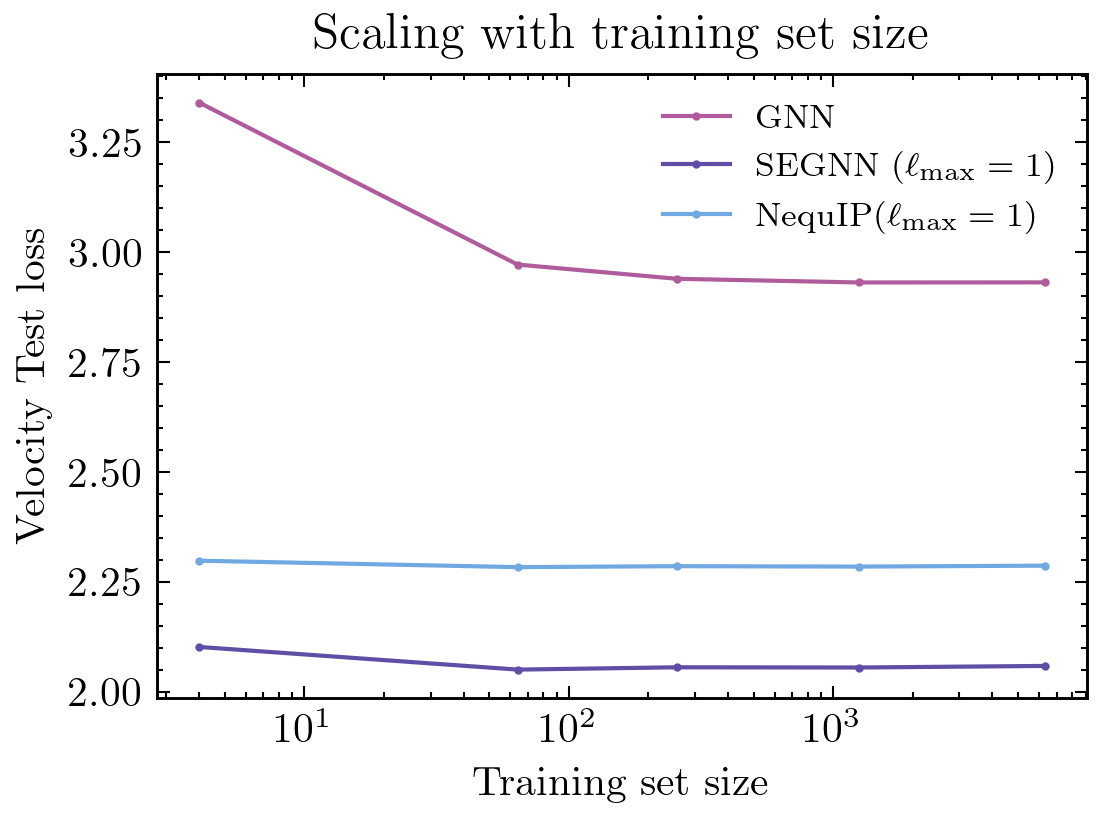

In [6]:
plt.figure(figsize=(4., 2.7)) 
plt.semilogx(n_list, gnn_losses, marker='o', markersize=1, label='GNN', color=gnn_color)
plt.semilogx(n_list, segnn_losses, marker='o', markersize=1, label='SEGNN ($\ell_\mathrm{max}=1$)', color=segnn_color)
plt.semilogx(n_list, nequip_losses, marker='o', markersize=1, label='NequIP($\ell_\mathrm{max}=1$)', color=nequip_color)
plt.legend(fontsize=8)
plt.ylabel('Velocity Test loss')
plt.xlabel('Training set size')
plt.title('Scaling with training set size')
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.7) 
plt.savefig('figures/scaling.pdf', bbox_inches='tight')

In [7]:
gnn_losses = read_loss('gnn', 1248, 'train',)
segnn_losses = read_loss('segnn', 1248, 'train',)
segnn_lmax2_losses = read_loss('segnn_l2', 1248,'train')
nequip_losses = read_loss('nequip', 1248, 'train',)
nequip_lmax2_losses = read_loss('nequip_l2', 1248, 'train',)

test_gnn_losses = read_loss('gnn', 1248, 'test',)
test_segnn_losses = read_loss('segnn', 1248, 'test',)
test_segnn_lmax2_losses = read_loss('segnn_l2', 1248,'test')
test_nequip_losses = read_loss('nequip', 1248, 'test',)
test_nequip_lmax2_losses = read_loss('nequip_l2', 1248, 'test',)



In [ ]:
ds = 20
plt.figure(figsize=(4., 2.7)) 
plt.axhline(test_gnn_losses, color=gnn_color, linestyle='--', alpha=0.5)
plt.axhline(test_segnn_losses, color=segnn_color, linestyle='--', alpha=0.5)
plt.axhline(test_segnn_lmax2_losses, color=segnn_lmax2_color, linestyle='--', alpha=0.5)
plt.axhline(test_nequip_losses, color=nequip_color, linestyle='--', alpha=0.5)
plt.axhline(test_nequip_lmax2_losses, color=nequip_lmax2_color, linestyle='--', alpha=0.5)
plt.plot(np.convolve(gnn_losses, np.ones(ds)/ds, mode='valid'), label='GNN', color=gnn_color)
plt.plot(np.convolve(segnn_losses, np.ones(ds)/ds, mode='valid'),  label='SEGNN ($\ell_\mathrm{max}=1$)',  color=segnn_color)
plt.plot(np.convolve(segnn_lmax2_losses, np.ones(ds)/ds, mode='valid'), label='SEGNN ($\ell_\mathrm{max}=2$)', color=segnn_lmax2_color)
plt.plot(np.convolve(nequip_losses, np.ones(ds)/ds, mode='valid'),  label='NequIP($\ell_\mathrm{max}=1$)', color=nequip_color)
plt.plot(np.convolve(nequip_lmax2_losses, np.ones(ds)/ds, mode='valid'),  label='NequIP($\ell_\mathrm{max}=2$)', color=nequip_lmax2_color)
plt.legend(fontsize=8, frameon=True, fancybox=True)
plt.ylabel('Train loss')
plt.xlabel('Step')
plt.title('Node Task: Velocity Prediction', fontsize=10, fontweight='bold')
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.7) 
plt.ylim(1.8,8.)
plt.savefig('figures/velocity_train_loss.pdf', bbox_inches='tight')

# Graph task

In [5]:
n_list = [4, 64, 256, 1248, 6304, 11200]

models_dir = Path('experiments/')

def read_loss(model, n, dataset, l_max = None):
    expt_dir = f'{model}_N={n}'
    if model != 'MLP':
        expt_dir += '_tpcf=none'
    else:
        expt_dir += '_tpcf=all'
        
    if l_max != None:
        expt_dir += f'_lmax={l_max}'
        
    with open(models_dir / expt_dir / f'loss_dict.pkl', 'rb') as f:
        f = pickle.load(f)
    return np.array(f[f'{dataset}_loss'])

def get_losses_for_model(model, n_list, l_max=None):
    test_losses = []
    for n in n_list:
        test_losses.append(read_loss(model, n, 'test', l_max).mean())
    return test_losses

In [6]:
mlp_losses = get_losses_for_model('MLP', n_list)
gnn_losses = get_losses_for_model('GNN', n_list)
segnn_losses = get_losses_for_model('SEGNN', n_list)
nequip_losses = get_losses_for_model('NequIP', n_list)
segnn_lmax2_losses = get_losses_for_model('SEGNN', n_list, l_max=2)
nequip_lmax2_losses = get_losses_for_model('NequIP', n_list, l_max=2)
egnn_losses = get_losses_for_model('EGNN', n_list)

/home/jballa/.local/lib/python3.9/site-packages/jax/_src/xla_bridge.py:262: RuntimeWarning: Device 0 has CUDA compute capability 3.5 which is lower than the minimum supported compute capability 5.2. See https://jax.readthedocs.io/en/latest/installation.html#nvidia-gpu for more details
  warnings.warn(


In [8]:
np.save('2PCF_losses', mlp_losses)
np.save('GNN_losses', gnn_losses)
np.save('SEGNN_losses', segnn_losses)
np.save('SEGNN_lmax2_losses', segnn_lmax2_losses)
np.save('NequIP_losses', nequip_losses)
np.save('NequIP_lmax2_losses', nequip_lmax2_losses)
np.save('EGNN_losses', egnn_losses)

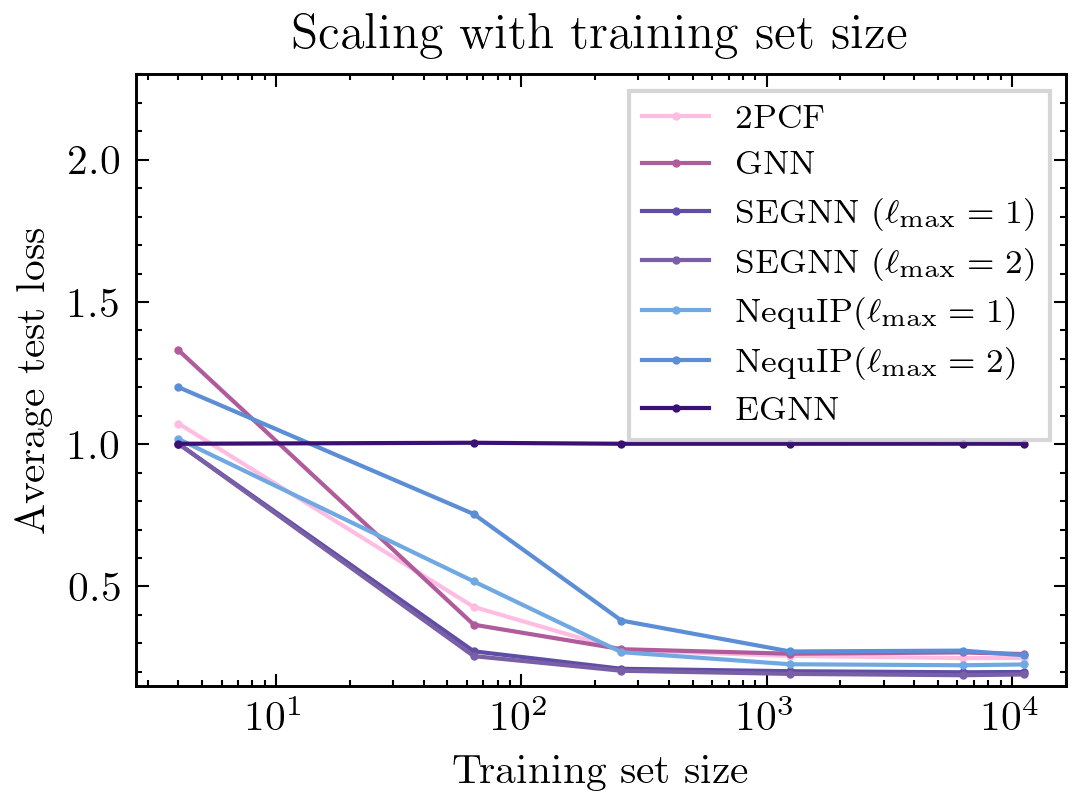

In [124]:
plt.figure(figsize=(4., 2.7)) 
plt.semilogx(n_list, mlp_losses, marker='o', markersize=1, label='2PCF', color=mlp_color)
plt.semilogx(n_list, gnn_losses, marker='o', markersize=1, label='GNN', color=gnn_color)
plt.semilogx(n_list, segnn_losses, marker='o', markersize=1, label='SEGNN ($\ell_\mathrm{max}=1$)', color=segnn_color)
plt.semilogx(n_list, segnn_lmax2_losses, marker='o', markersize=1, label='SEGNN ($\ell_\mathrm{max}=2$)', color=segnn_lmax2_color)
plt.semilogx(n_list, nequip_losses, marker='o', markersize=1, label='NequIP($\ell_\mathrm{max}=1$)', color=nequip_color)
plt.semilogx(n_list, nequip_lmax2_losses, marker='o', markersize=1, label='NequIP($\ell_\mathrm{max}=2$)', color=nequip_lmax2_color)
plt.semilogx(n_list, egnn_losses, marker='o', markersize=1, label='EGNN', color=egnn_color)
plt.legend(fontsize=8, frameon=True, fancybox=False)
plt.ylim(0.15,2.3)
plt.ylabel('Average test loss')
plt.xlabel('Training set size')
plt.title('Scaling with training set size')
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.7) 
plt.savefig('figures/graph_scaling.pdf', bbox_inches='tight')

In [119]:
mlp_losses = read_loss('MLP', 1248, 'train',).mean(axis=1)
gnn_losses = read_loss('GNN', 1248, 'train',).mean(axis=1)
segnn_losses = read_loss('SEGNN', 1248, 'train',).mean(axis=1)
segnn_lmax2_losses = read_loss('SEGNN', 1248,'train', l_max=2).mean(axis=1)
nequip_losses = read_loss('NequIP', 1248, 'train',).mean(axis=1)
nequip_lmax2_losses = read_loss('NequIP', 1248, 'train',l_max=2).mean(axis=1)
egnn_losses = read_loss('EGNN', 1248, 'train').mean(axis=1)

mlp_val_losses = read_loss('MLP', 1248, 'val',)
gnn_val_losses = read_loss('GNN', 1248, 'val',)
segnn_val_losses = read_loss('SEGNN', 1248, 'val',)
segnn_val_lmax2_losses = read_loss('SEGNN', 1248,'val', l_max=2)
nequip_val_losses = read_loss('NequIP', 1248, 'val',)
nequip_val_lmax2_losses = read_loss('NequIP', 1248, 'val',l_max=2)
egnn_val_losses = read_loss('EGNN', 1248, 'val')

test_mlp_losses = read_loss('MLP', 1248, 'test',)
test_gnn_losses = read_loss('GNN', 1248, 'test',)
test_segnn_losses = read_loss('SEGNN', 1248, 'test',)
test_segnn_lmax2_losses = read_loss('SEGNN', 1248,'test',l_max=2)
test_nequip_losses = read_loss('NequIP', 1248, 'test',)
test_nequip_lmax2_losses = read_loss('NequIP', 1248, 'test',l_max=2)
test_egnn_losses = read_loss('EGNN', 1248, 'test')

In [100]:
with open('experiments/MLP_N=1248_tpcf=all_large/loss_dict.pkl', 'rb') as f:
    f = pickle.load(f)
mlp_large_losses = np.array(f['train_loss'])
mlp_large_val_losses = np.array(f['train_loss'])
mlp_large_val_losses[-1]

array([0.16228224, 0.2616903 ], dtype=float32)

In [87]:
print('MLP', mlp_val_losses[-1], mlp_val_losses[-1].mean())
print('GNN', gnn_val_losses[-1], gnn_val_losses[-1].mean())
print('EGNN', egnn_val_losses[-1], egnn_val_losses[-1].mean())
print('SEGNN (lmax=1)',segnn_val_losses[-1], segnn_val_losses[-1].mean())
print('SEGNN (lmax=2)',segnn_val_lmax2_losses[-1], segnn_val_lmax2_losses[-1].mean())
print('NequIP (lmax=1)',nequip_val_losses[-1], nequip_val_losses[-1].mean())
print('NequIP (lmax=2)',nequip_val_lmax2_losses[-1], nequip_val_lmax2_losses[-1].mean())

MLP [[0.15976919 0.33864677]] 0.24920797
GNN [[0.2103213 0.3111741]] 0.2607477
EGNN [[0.99982   1.0020838]] 1.0009519
SEGNN (lmax=1) [[0.18409757 0.2332374 ]] 0.20866749
SEGNN (lmax=2) [[0.18095508 0.21317415]] 0.19706461
NequIP (lmax=1) [[0.19902684 0.29982466]] 0.24942574
NequIP (lmax=2) [[0.21317595 0.38519692]] 0.29918644


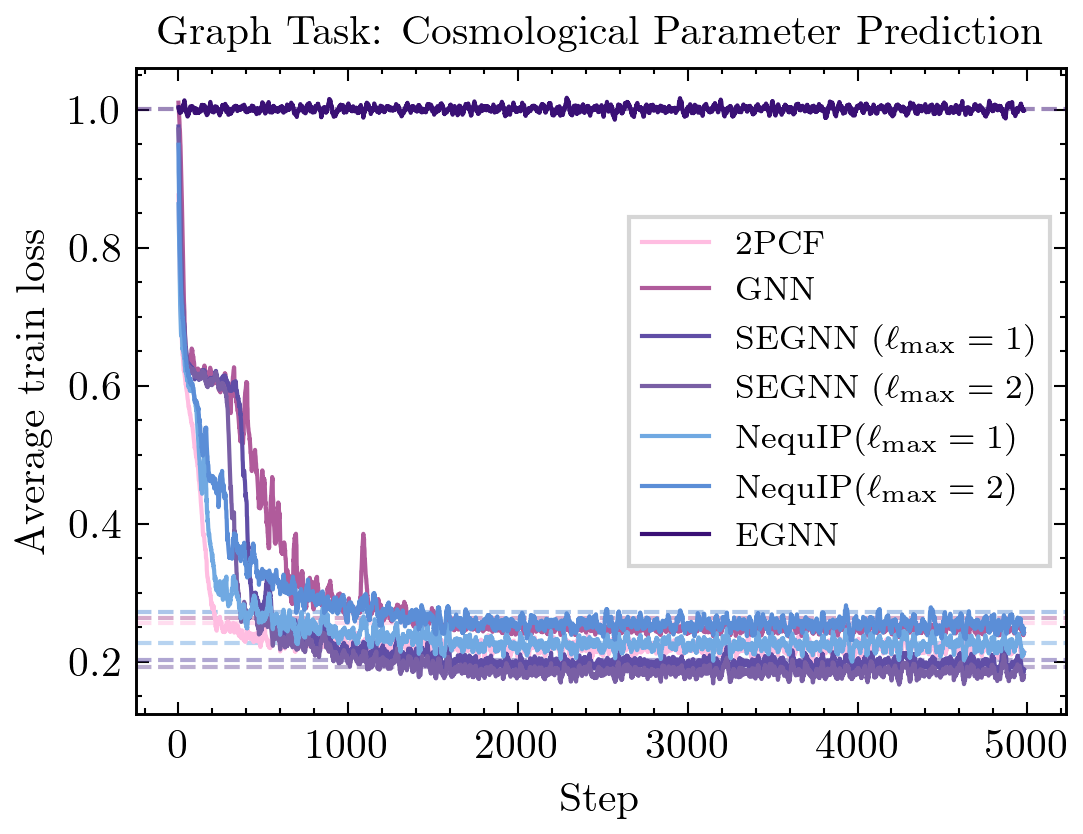

In [122]:
ds = 20
plt.figure(figsize=(4., 2.85)) 
plt.axhline(test_mlp_losses, color=mlp_color, linestyle='--', alpha=0.5)
plt.axhline(test_gnn_losses, color=gnn_color, linestyle='--', alpha=0.5)
plt.axhline(test_segnn_losses, color=segnn_color, linestyle='--', alpha=0.5)
plt.axhline(test_segnn_lmax2_losses, color=segnn_lmax2_color, linestyle='--', alpha=0.5)
plt.axhline(test_nequip_losses, color=nequip_color, linestyle='--', alpha=0.5)
plt.axhline(test_nequip_lmax2_losses, color=nequip_lmax2_color, linestyle='--', alpha=0.5)
# plt.axhline(test_egnn_losses, color=egnn_color, linestyle='--', alpha=0.5)
plt.plot(np.convolve(mlp_losses, np.ones(ds)/ds, mode='valid'), label='2PCF', color=mlp_color)
plt.plot(np.convolve(gnn_losses, np.ones(ds)/ds, mode='valid'), label='GNN', color=gnn_color)
plt.plot(np.convolve(segnn_losses, np.ones(ds)/ds, mode='valid'),  label='SEGNN ($\ell_\mathrm{max}=1$)',  color=segnn_color)
plt.plot(np.convolve(segnn_lmax2_losses, np.ones(ds)/ds, mode='valid'), label='SEGNN ($\ell_\mathrm{max}=2$)', color=segnn_lmax2_color)
plt.plot(np.convolve(nequip_losses, np.ones(ds)/ds, mode='valid'),  label='NequIP($\ell_\mathrm{max}=1$)', color=nequip_color)
plt.plot(np.convolve(nequip_lmax2_losses, np.ones(ds)/ds, mode='valid'),  label='NequIP($\ell_\mathrm{max}=2$)', color=nequip_lmax2_color)
# plt.plot(np.convolve(egnn_losses, np.ones(ds)/ds, mode='valid'), label='EGNN', color=egnn_color)
plt.legend(fontsize=8, frameon=True, fancybox=False)
plt.ylabel('Average train loss')
plt.xlabel('Step')
plt.title('Graph Task: Cosmological Parameter Prediction', fontsize=10, fontweight='bold')
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.7) 
# plt.ylim(1.8,8.)
plt.savefig('figures/graph_train_loss.pdf', bbox_inches='tight')